# Import Datasets

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 4.0 MB/s 
     |████████████████████████████████| 212 kB 56.5 MB/s 
     |████████████████████████████████| 182 kB 58.5 MB/s 
     |████████████████████████████████| 132 kB 62.3 MB/s 
     |████████████████████████████████| 127 kB 59.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import datasets

In [ ]:
from datasets import load_dataset
dataset = load_dataset("xsum")


Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

Dataset xsum downloaded and prepared to /root/.cache/huggingface/datasets/xsum/default/1.2.0/082863bf4754ee058a5b6f6525d0cb2b18eadb62c7b370b095d1364050a52b71. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset['train']

Dataset({
    features: ['document', 'summary', 'id'],
    num_rows: 204045
})

# Import Libraries

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pd.DataFrame.from_dict(dataset['train'])

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984
...,...,...,...
204040,The initial figure released in July was booste...,UK economic growth for the second quarter of t...,34084759
204041,"MEPs, including European Parliament chief Brex...",Theresa May's offer to give EU citizens in the...,40552318
204042,Lincoln Red Imps will bring a 1-0 lead to Glas...,Erik Sviatchenko is adamant that Celtic will p...,36781065
204043,Former Liverpool defender Mark Lawrenson expan...,People have spent a large part of this season ...,31579588


# Read ID file

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/text_id.txt", sep=" ", header=None)
data.columns = ["URL"]

In [ ]:
data['URL'][1] 

# we want the last number

'http://web.archive.org/web/20160508044655/http://www.bbc.co.uk/news/world-europe-36236576'

## ID extraction

In [ ]:
int(data['URL'][1].split('-')[-1])

36236576

In [ ]:
list_id = pd.DataFrame([el.strip('/').strip('.app').split('-')[-1].split('/')[-1] for el in data['URL']])

list_id['URL'] = data['URL']

In [ ]:
list_id

,0,URL
0,35680662,http://web.archive.org/web/20160301174238/http...
1,36236576,http://web.archive.org/web/20160508044655/http...
2,34171261,http://web.archive.org/web/20170101083631/http...
3,38302280,http://web.archive.org/web/20170109143638/http...
4,37722200,http://web.archive.org/web/20170117213647/http...
...,...,...
226706,37311716,http://web.archive.org/web/20170416090245/http...
226707,36819854,http://web.archive.org/web/20170617051814/http...
226708,35268824,http://web.archive.org/web/20160108204123/http...
226709,30348499,http://web.archive.org/web/20150420011916/http...


# Extract only sport articles

In [ ]:
list_id['sport'] = 0

for i in range(0,len(list_id)):
  if 'sport' in list_id['URL'][i].split('/'):
    list_id['sport'][i] = 1

<ipython-input-87-4f15667cf092>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_id['sport'][i] = 1


In [ ]:
list_id['sport'].value_counts()

# distribution of articles --> sports articles are more than 50k

0    171131
1     55580
Name: sport, dtype: int64

## Create df of sport articles

In [ ]:
df_sport = list_id[list_id['sport']==1]

## Removal of articles without ID's

In [ ]:
df_sport = df_sport[df_sport[0]!='footer']
df_sport = df_sport[df_sport[0]!='button']

## Cast INT type

In [ ]:
df_sport[0] = df_sport[0].astype('int')

## Create df Category column

the following code has been executed for all df: train, validation and test.

In [ ]:
df_sport.columns = ["id",'URL','sport']

In [ ]:
df_train = pd.DataFrame.from_dict(dataset['train'])

In [ ]:
df_train['id'] = df_train['id'].astype('int')

In [ ]:
df_train2 = df_train.merge(df_sport, on='id', how='inner')

In [ ]:
df_train2.drop(['sport'], axis=1, inplace=True)

In [ ]:
df_train2['URL'][9].split('sport/')[1].split('/')[0]

'tennis'

In [ ]:
df_train2['category'] = [el.split('/sport/')[1].split('/')[0] for el in df_train2['URL']]

In [ ]:
df_train2

,document,summary,id,URL,category
0,The 48-year-old former Arsenal goalkeeper play...,West Brom have appointed Nicky Hammond as tech...,36175342,http://web.archive.org/web/20160602202928/http...,football
1,Media playback is not supported on this device...,"A ""medal at any cost"" approach created a ""cult...",39339718,http://web.archive.org/web/20170402044231/http...,cycling
2,"""I'm really looking forward to it - the home o...",Manager Brendan Rodgers is sure Celtic can exp...,37732028,http://web.archive.org/web/20170201034628/http...,football
3,The National League sold the Republic of Irela...,Torquay United boss Kevin Nicholson says none ...,37248643,http://web.archive.org/web/20160901182337/http...,football
4,The 33-year-old has featured only twice for th...,Leicester City striker Gary Taylor-Fletcher ha...,29771956,http://web.archive.org/web/20170203104937/http...,football
...,...,...,...,...,...
2825,"Tries from Macgraff Leuluai, Ah Van and Chris ...",Patrick Ah Van scored two tries on his return ...,36469756,http://web.archive.org/web/20160610062355/http...,rugby-league
2826,Media playback is not supported on this device...,Gareth O'Brien kicked a drop-goal in golden-po...,37488691,http://web.archive.org/web/20170725191835/http...,rugby-league
2827,"Rovers began in the final relegation place, le...",Blackburn were relegated to League One on goal...,39760414,http://web.archive.org/web/20170508002143/http...,football
2828,Luke Berry came closest to opening the scoring...,Promotion-chasing Stevenage were held to a by ...,39312689,http://web.archive.org/web/20170401064339/http...,football


# Export df

In [ ]:
df_train2.to_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/train_sport.csv', sep = ';', index=False)

In [ ]:
df_train2.to_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/validation_sport.csv', sep = ';', index=False)

In [ ]:
df_train2.to_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/test_sport.csv', sep = ';', index=False)

In [ ]:
tr = pd.read_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/train_sport.csv', sep = ';')
tr

,document,summary,id,URL,category
0,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548,http://web.archive.org/web/20160403040918/http...,formula1
1,Simone Favaro got the crucial try with the las...,Defending Pro12 champions Glasgow Warriors bag...,34540833,http://web.archive.org/web/20151017072732/http...,rugby-union
2,Belgian cyclist Demoitie died after a collisio...,Welsh cyclist Luke Rowe says changes to the sp...,35932467,http://web.archive.org/web/20160404024929/http...,wales
3,"Gundogan, 26, told BBC Sport he ""can see the f...",Manchester City midfielder Ilkay Gundogan says...,40758845,http://web.archive.org/web/20170729030028/http...,football
4,"The Bath-born player, 28, has made 36 appearan...",Newport Gwent Dragons number eight Ed Jackson ...,38900884,http://web.archive.org/web/20170208052041/http...,rugby-union
...,...,...,...,...,...
49797,Media playback is not supported on this device...,It has been described as the greatest comeback...,24285864,http://web.archive.org/web/20151011193645/http...,sailing
49798,The Welshman is five over par after a third ro...,Jamie Donaldson says he is targeting his highe...,36817060,http://web.archive.org/web/20160717041047/http...,wales
49799,"His move to City, who play at Aggborough, home...",Former £5m striker Lee Hughes has joined Natio...,34138004,http://web.archive.org/web/20170210153522/http...,football
49800,Lincoln Red Imps will bring a 1-0 lead to Glas...,Erik Sviatchenko is adamant that Celtic will p...,36781065,http://web.archive.org/web/20160715233230/http...,football


# EDA

In [ ]:
train.groupby('category', as_index=False).count()


,category,document,summary,id,URL
0,american-football,113,113,113,113
1,archery,11,11,11,11
2,athletics,831,831,831,831
3,badminton,70,70,70,70
4,baseball,26,26,26,26
5,basketball,155,155,155,155
6,bodypositive,22,22,22,22
7,bowls,31,31,31,31
8,boxing,844,844,844,844
9,canoeing,31,31,31,31


In [ ]:
l = train.groupby('category', as_index=False).count()
l = l[l['document']>1]
l = l['category'].unique().tolist()
l.remove('0')


In [ ]:
train = train[train['category'].isin(l)]
train

,document,summary,id,URL,category
0,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548,http://web.archive.org/web/20160403040918/http...,formula1
1,Simone Favaro got the crucial try with the las...,Defending Pro12 champions Glasgow Warriors bag...,34540833,http://web.archive.org/web/20151017072732/http...,rugby-union
2,Belgian cyclist Demoitie died after a collisio...,Welsh cyclist Luke Rowe says changes to the sp...,35932467,http://web.archive.org/web/20160404024929/http...,wales
3,"Gundogan, 26, told BBC Sport he ""can see the f...",Manchester City midfielder Ilkay Gundogan says...,40758845,http://web.archive.org/web/20170729030028/http...,football
4,"The Bath-born player, 28, has made 36 appearan...",Newport Gwent Dragons number eight Ed Jackson ...,38900884,http://web.archive.org/web/20170208052041/http...,rugby-union
...,...,...,...,...,...
49797,Media playback is not supported on this device...,It has been described as the greatest comeback...,24285864,http://web.archive.org/web/20151011193645/http...,sailing
49798,The Welshman is five over par after a third ro...,Jamie Donaldson says he is targeting his highe...,36817060,http://web.archive.org/web/20160717041047/http...,wales
49799,"His move to City, who play at Aggborough, home...",Former £5m striker Lee Hughes has joined Natio...,34138004,http://web.archive.org/web/20170210153522/http...,football
49800,Lincoln Red Imps will bring a 1-0 lead to Glas...,Erik Sviatchenko is adamant that Celtic will p...,36781065,http://web.archive.org/web/20160715233230/http...,football


In [ ]:
train['category'].nunique()

60

In [ ]:
import seaborn as sns

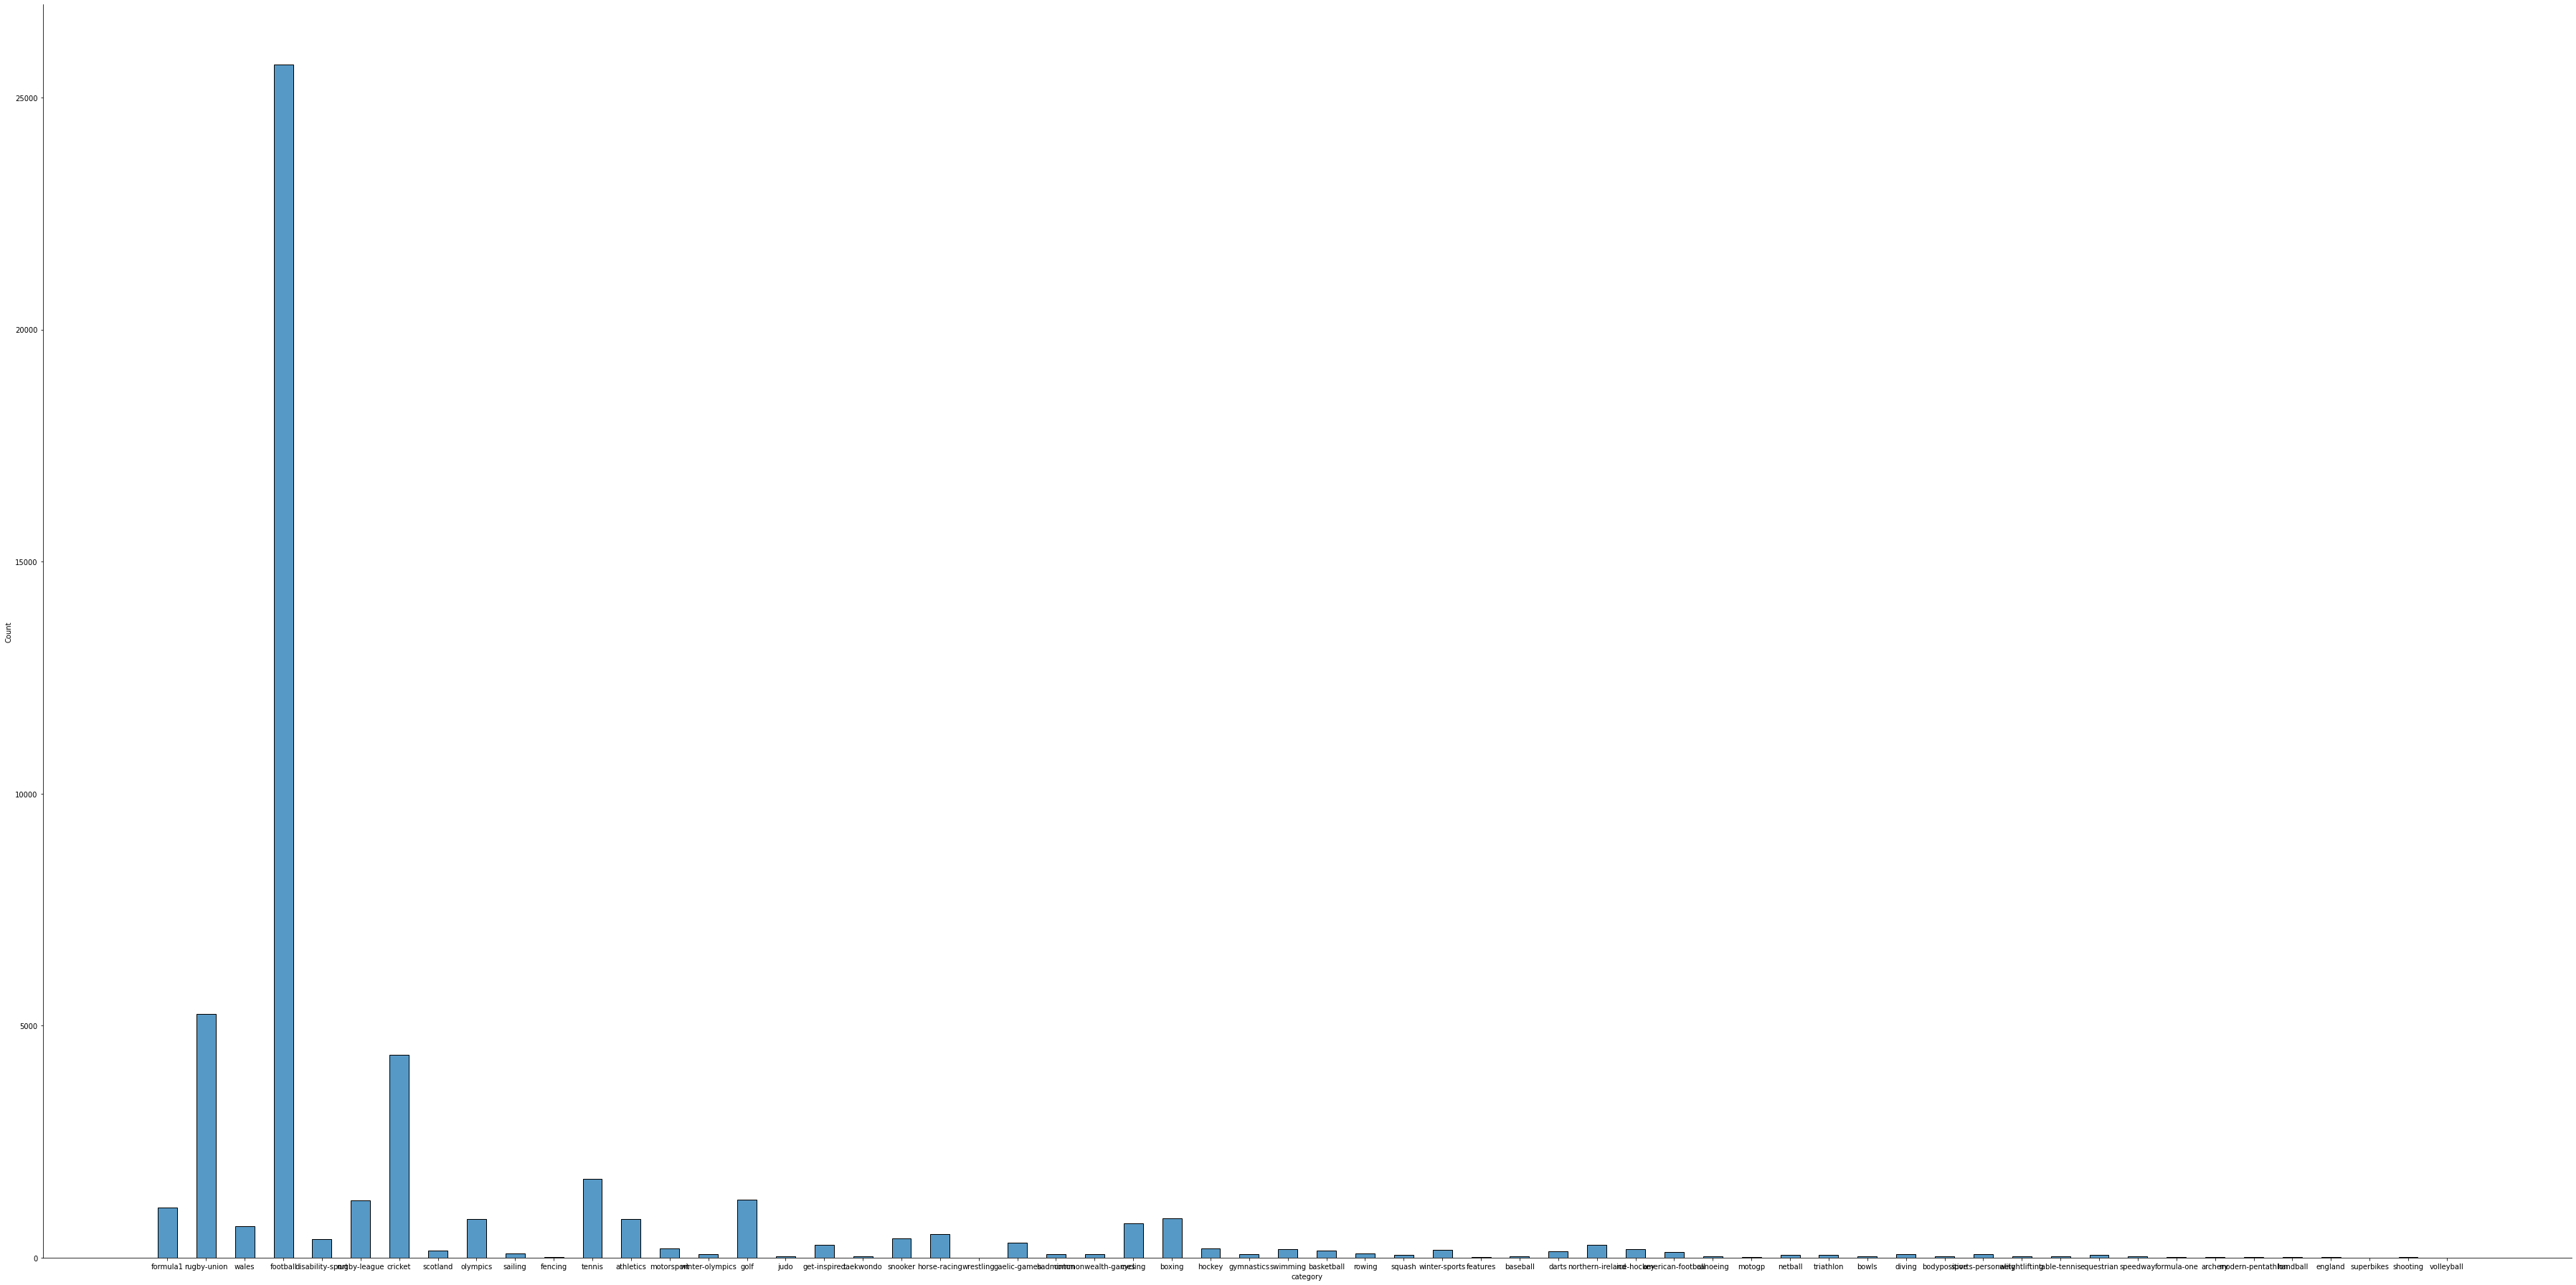

In [ ]:
sns.displot(train, x="category", height = 25, aspect = 2, shrink=0.5)